# A Credit Scoring System for Tookitaki
This is a step-by-step tutorial on how to use the data provided to predict user's credit score
This notebook contains the following phases
* Data Preparation
* Feature Engineering
* Modelling
* Explaination

## 1. Data Preparation
This phase includes:
* Data Reading
* Data Cleaning


First, Let's import the library that will be using in the following

In [1]:
import numpy as np
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

### 1.1 Account

In [2]:
account_train_data = pd.read_csv('data/raw_account_70_new.csv',low_memory=False)
account_train_data.head(10)

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,0,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",NaN,01-Sep-15,01-Jul-14,NaN,NaN,NaN,NaN,NaN
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,NaN,03-Oct-15,16201.0,10390,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000.0,1400.0,NaN,3.0,5603.0
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,NaN,30-Sep-15,41028.0,34420,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,NaN,NaN,NaN,NaN,NaN
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,0,NaN,"""""""1200900600600600300000000000000000000000000...",NaN,01-Jul-07,01-Feb-06,NaN,NaN,NaN,NaN,NaN
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,NaN,31-May-15,20250.0,13500,NaN,"""""""000000000000000""""""",NaN,01-May-15,01-Jan-15,NaN,NaN,NaN,NaN,NaN
5,20-Jul-15,15606,09-Jul-15,6,1,14-Jan-15,02-May-15,NaN,31-May-15,20000.0,8000,NaN,"""""""000000000000000""""""",NaN,01-May-15,01-Jan-15,NaN,NaN,NaN,NaN,NaN
6,20-Jul-15,15606,09-Jul-15,6,1,29-Dec-14,02-May-15,NaN,31-May-15,25100.0,12550,NaN,"""""""000000000000000000""""""",NaN,01-May-15,01-Dec-14,NaN,NaN,NaN,NaN,NaN
7,20-Jul-15,15606,09-Jul-15,6,1,22-Oct-14,02-May-15,NaN,31-May-15,16690.0,2780,NaN,"""""""000000000000000000000000""""""",NaN,01-May-15,01-Oct-14,NaN,NaN,NaN,NaN,NaN
8,20-Jul-15,15606,09-Jul-15,10,1,04-Dec-12,08-May-15,NaN,31-May-15,140160.0,128407,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000000000000""""""",01-May-15,01-Dec-12,140000.0,NaN,39.0,NaN,6516.0
9,20-Jul-15,15606,09-Jul-15,10,1,01-Aug-12,21-May-15,NaN,26-Jun-15,NaN,26879,NaN,"""""""000000000XXX000000000000030XXX0000000000000...","""""""030000000000XXX000000000000000000000000XXX0...",01-Jun-15,01-Aug-12,NaN,NaN,NaN,3.0,NaN


In [3]:
account_train_data.head(10)

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,0,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",NaN,01-Sep-15,01-Jul-14,NaN,NaN,NaN,NaN,NaN
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,NaN,03-Oct-15,16201.0,10390,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000.0,1400.0,NaN,3.0,5603.0
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,NaN,30-Sep-15,41028.0,34420,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,NaN,NaN,NaN,NaN,NaN
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,0,NaN,"""""""1200900600600600300000000000000000000000000...",NaN,01-Jul-07,01-Feb-06,NaN,NaN,NaN,NaN,NaN
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,NaN,31-May-15,20250.0,13500,NaN,"""""""000000000000000""""""",NaN,01-May-15,01-Jan-15,NaN,NaN,NaN,NaN,NaN
5,20-Jul-15,15606,09-Jul-15,6,1,14-Jan-15,02-May-15,NaN,31-May-15,20000.0,8000,NaN,"""""""000000000000000""""""",NaN,01-May-15,01-Jan-15,NaN,NaN,NaN,NaN,NaN
6,20-Jul-15,15606,09-Jul-15,6,1,29-Dec-14,02-May-15,NaN,31-May-15,25100.0,12550,NaN,"""""""000000000000000000""""""",NaN,01-May-15,01-Dec-14,NaN,NaN,NaN,NaN,NaN
7,20-Jul-15,15606,09-Jul-15,6,1,22-Oct-14,02-May-15,NaN,31-May-15,16690.0,2780,NaN,"""""""000000000000000000000000""""""",NaN,01-May-15,01-Oct-14,NaN,NaN,NaN,NaN,NaN
8,20-Jul-15,15606,09-Jul-15,10,1,04-Dec-12,08-May-15,NaN,31-May-15,140160.0,128407,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000000000000""""""",01-May-15,01-Dec-12,140000.0,NaN,39.0,NaN,6516.0
9,20-Jul-15,15606,09-Jul-15,10,1,01-Aug-12,21-May-15,NaN,26-Jun-15,NaN,26879,NaN,"""""""000000000XXX000000000000030XXX0000000000000...","""""""030000000000XXX000000000000000000000000XXX0...",01-Jun-15,01-Aug-12,NaN,NaN,NaN,3.0,NaN


### 1.2 Enquiry

In [4]:
enquiry_train_data = pd.read_csv('data/raw_enquiry_70_new.csv')
enquiry_train_data.head(10)

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2.0,3500000.0
1,18-Apr-15,1,21-Apr-15,5-Mar-14,5.0,500000.0
2,18-Apr-15,1,21-Apr-15,5-Mar-14,0.0,50000.0
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10.0,50000.0
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10.0,1000.0
5,18-Apr-15,1,21-Apr-15,8-Feb-13,10.0,1000.0
6,18-Apr-15,1,21-Apr-15,30-Nov-12,10.0,1000.0
7,18-Apr-15,1,21-Apr-15,30-May-12,10.0,1000.0
8,18-Apr-15,1,21-Apr-15,24-May-11,10.0,1000.0
9,18-Apr-15,1,21-Apr-15,10-Nov-10,10.0,150.0


### 1.3 Data

In [5]:
rawdata_train_data = pd.read_csv('data/raw_data_70_new.csv',low_memory=False)
raw_data_columns = rawdata_train_data.columns.tolist()

we can see that the raw data files contains a lot of NaN values. if one columns contain more than 50% nan value, we will think this column is not informative at all

In [6]:
rawdata_train_data=rawdata_train_data.dropna(thresh=(0.5*len(rawdata_train_data)),axis=1)
processed_raw_data_columns = rawdata_train_data.columns.tolist()
dropped_rawdata_columns = list(set(raw_data_columns) - set(processed_raw_data_columns))
print(dropped_rawdata_columns)

['feature_74', 'feature_18', 'feature_73', 'feature_17', 'feature_10', 'feature_13', 'feature_8', 'feature_9', 'feature_49', 'feature_48', 'feature_61', 'feature_45', 'feature_57']


**remember**, dropped_rawdata_columns is an important variable, it make it possible to do the same transformation on test data set

In [7]:
print('rawdata remaining column num is: ',len(rawdata_train_data.columns.tolist()))

('rawdata remaining column num is: ', 70)


Now, let's look at the three files. They all have one common column: **customer_no**. So we can merge them together into a new dataframe from *account_train_data* and *enquiry_train_data* and add them into *rawdata_train_data*

Let's analyze the skewness of the dataset first. Let's see how much of them are labelled as 1

In [8]:
print sum(rawdata_train_data["Bad_label"].tolist())*1.0/len(rawdata_train_data["Bad_label"]) # a boolean

0.042015400067


We can see that only 4.2% are labelled as 1. So we may consider this problem as an **Anomaly Detection Problem**

## 2.Feature Engineering

### 2.1 consturct features from account data
We can construct features from Account

* **payment_history_avg_dpd_0_29_bucket**: mean count of accounts that is in 0-29 dpd bucket throughout the payment history
* **total_diff_lastpaymt_opened_dt**: The total duration between last payment date and account opened date of all accounts
* **min_months_last_30_plus**: The smallest number of months passed before first 30+ dpd appeared for each account.
* **utilisation_trend**: [total cur_bal_amt / total credit limit] / [mean cur_bal_amt / (mean credit limit+ mean_cashlimit)]
* **Ratio_currbalance_creditlimit**: [total cur_bal_amt / total credit limit]
* **mean_diff_lastpaymt_opened_dt**: The average duration between last payment date and account opened date of all accounts
* **payment_history_mean_length** : average length of payment_history variable

Let's convert payment history to month-by-month format( Reference: CIBIL Guide.pdf page 50)

In [9]:
# converting payment history 1 and 2 string to columns

def convert_ph_to_cols(the_data, original_col, new_prefix):
    months=[]
    the_data[original_col]=the_data[original_col].fillna('0')
    the_data[original_col] = the_data[original_col].map(lambda x: x.lstrip('"""').rstrip('"""'))
    for i in the_data[original_col]:
        j=re.findall("...",i)
        months.append(j)
    ph_cols = [new_prefix + str(i) for i in range(0,18)]
    the_data[ph_cols] = pd.DataFrame(pd.Series(months).values.tolist())
    

def convert_payment_histories(data):
    convert_ph_to_cols(data, 'paymenthistory1','ph1_')
    convert_ph_to_cols(data, 'paymenthistory2','ph2_')

convert_payment_histories(account_train_data)

#show ph_ columns
pattern = re.compile("^ph[0-9]_[0-9]+$")
pay_status_columns = [ x for x in account_train_data.columns if (pattern.match(x))]
account_train_data[pay_status_columns].head(10)

#Now let's focus on raw_account_70_new.csv first. Let's analyze some features

,ph1_0,ph1_1,ph1_2,ph1_3,ph1_4,ph1_5,ph1_6,ph1_7,ph1_8,ph1_9,ph1_10,ph1_11,ph1_12,ph1_13,ph1_14,ph1_15,ph1_16,ph1_17,ph2_0,ph2_1,ph2_2,ph2_3,ph2_4,ph2_5,ph2_6,ph2_7,ph2_8,ph2_9,ph2_10,ph2_11,ph2_12,ph2_13,ph2_14,ph2_15,ph2_16,ph2_17
0,STD,STD,STD,XXX,XXX,XXX,XXX,XXX,STD,XXX,XXX,XXX,XXX,XXX,STD,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,XXX,000,000,000,000,000,000,000,000
2,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000
3,120,090,060,060,060,030,000,000,000,000,000,000,000,000,000,000,000,000,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,000,000,000,000,000,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,000,000,000,000,000,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,000,000,000,000,000,000,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,000,000,000,000,000,000,000,000,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,None,None,None,None,None,None
9,000,000,000,XXX,000,000,000,000,030,XXX,000,000,000,000,000,000,000,000,030,000,000,000,XXX,000,000,000,000,000,000,000,000,XXX,000,000,000,None


#### create payment_history_avg_dpd_0_29_bucket

In [10]:
def convert_dpd(account_data):
    for i in range(36):
        account_data['dpd_'+str(i)] = np.where(account_data[pay_status_columns[i]].str.lower().str.contains("std|xxx|sub|sma|lss|dbt"), np.nan,
                                  account_data[pay_status_columns[i]]).astype('float64')

    dpd_columns = ['dpd_'+str(i) for i in range(36)]
    account_data['count_0_29'] = np.sum((account_data[dpd_columns]< 30) & (account_data[dpd_columns]>=0), axis=1)
#     return acccount_data
         

def get_payment_history_avg_dpd_0_29_bucket(account_data):
    convert_dpd(account_data)
    for i in range(36):
        account_data['dpd_'+str(i)] = np.where(account_data[pay_status_columns[i]].str.lower().str.contains("std|xxx|sub|sma|lss|dbt"), np.nan, 
                                               account_data[pay_status_columns[i]]).astype('float64')
        dpd_columns = ['dpd_'+str(i) for i in range(36)]
        account_data['count_0_29'] = np.sum((account_data[dpd_columns]< 30) & (account_data[dpd_columns]>=0), axis=1)
        payment_history_avg_dpd_0_29_bucket = account_data.groupby('customer_no')['count_0_29'].agg(
        'mean').reset_index()
    return payment_history_avg_dpd_0_29_bucket

payment_history_avg_dpd_0_29_bucket = get_payment_history_avg_dpd_0_29_bucket(account_train_data)
payment_history_avg_dpd_0_29_bucket.head(10)

,customer_no,count_0_29
0,1,7.277778
1,2,35.000000
2,3,36.000000
3,4,18.294118
4,5,16.000000
5,6,13.250000
6,7,24.714286
7,8,14.800000
8,9,19.166667
9,10,14.666667


#### create Ratio_currbalance_creditlimit

In [11]:
def get_ratio_currbalance_creditlimit(account_data):
    ratio_currbalance_creditlimit = account_data.groupby('customer_no')['cur_balance_amt', 'creditlimit'].agg(
        'sum').reset_index()
    ratio_currbalance_creditlimit['ratio_currbalance_creditlimit'] = ratio_currbalance_creditlimit['cur_balance_amt'] / \
                                                                     ratio_currbalance_creditlimit['creditlimit']
    ratio_currbalance_creditlimit = ratio_currbalance_creditlimit.drop(['cur_balance_amt', 'creditlimit'], axis=1)
    return ratio_currbalance_creditlimit
    
ratio_currbalance_creditlimit = get_ratio_currbalance_creditlimit(account_train_data)
ratio_currbalance_creditlimit.head(10)

,customer_no,ratio_currbalance_creditlimit
0,1,7.037100
1,2,0.030754
2,3,NaN
3,4,1.930512
4,5,NaN
5,6,10.953087
6,7,0.226345
7,8,24.483558
8,9,22.858634
9,10,0.611652


#### create min_month_last_30_plus

In [12]:
def generete_last_30_plus(row):
    for i in range(36):
        dpd_cols = 'dpd_' + str(i)
        if row[dpd_cols] >= 30:
            return i
    return 37 # never had dpd 30+

def get_min_month_last_30_plus(account_data):
    account_data['last_30_plus'] = account_data.apply(generete_last_30_plus,axis=1)
    min_months_last_30_plus = account_data.groupby('customer_no')['last_30_plus'].agg(min).reset_index()
    return min_months_last_30_plus


min_months_last_30_plus = get_min_month_last_30_plus(account_train_data)
min_months_last_30_plus.head(10)

,customer_no,last_30_plus
0,1,0
1,2,37
2,3,37
3,4,1
4,5,37
5,6,0
6,7,37
7,8,24
8,9,37
9,10,7


#### create utilisation_trend

In [13]:
def get_utilisation_trend(account_data): 
    total_cur_bal_amt = account_data.groupby('customer_no')['cur_balance_amt'].agg('sum').reset_index(
        name='total_cur_bal_amt')
    mean_cur_bal_amt = account_data.groupby('customer_no')['cur_balance_amt'].agg('mean').reset_index(
        name='mean_cur_bal_amt')
    mean_credit_limit = account_data.groupby('customer_no')['creditlimit'].agg('sum').reset_index(name='mean_credit_limit')
    mean_cash_limit = account_data.groupby('customer_no')['cashlimit'].agg('sum').reset_index(name='mean_cash_limit')
    total_credit_limit = account_data.groupby('customer_no')['creditlimit'].agg('sum').reset_index(name='total_credit_limit')
    ut = total_cur_bal_amt.merge(mean_cur_bal_amt, on='customer_no').merge(mean_credit_limit, how='outer',
                                                                           on='customer_no').merge(mean_cash_limit,
                                                                                                   how='outer',
                                                                                                   on='customer_no').merge(
        total_credit_limit, how='outer', on='customer_no')

    ut['utilisation_trend'] = (ut['total_cur_bal_amt'] / ut['total_credit_limit']) / (
    ut['mean_cur_bal_amt'] / (ut['mean_cash_limit'] + ut['mean_credit_limit']))
    ut = ut.drop(
        ['total_cur_bal_amt', 'mean_cur_bal_amt', 'mean_credit_limit', 'mean_cash_limit', 'total_credit_limit'], axis=1)
    return ut

utilisation_trend = get_utilisation_trend(account_train_data)
utilisation_trend.head(10)

,customer_no,utilisation_trend
0,1,22.513433
1,2,2.000002
2,3,NaN
3,4,23.419456
4,5,NaN
5,6,44.948233
6,7,10.589823
7,8,21.518325
8,9,6.980592
9,10,19.200000


#### create mean_diff_lastpaymt_opened_dt and total_diff_lastpaymt_opened_dt

In [14]:
def get_diff_lastpaymt_opened_dt(account_data):
    account_data['opened_dt'] = pd.to_datetime(account_data['opened_dt'])
    account_data['last_paymt_dt'] = pd.to_datetime(account_data['last_paymt_dt'])
    account_data['diff_in_dates'] = (account_data['last_paymt_dt'] - account_data['opened_dt']).dt.days
    diff_in_last_pay_date_sum = account_data.groupby('customer_no')['diff_in_dates'].agg('sum').reset_index(
            name='total_diff_lastpaymt_opened_dt')
    diff_in_last_pay_date_mean = account_data.groupby('customer_no')['diff_in_dates'].agg('mean').reset_index(
            name='average_diff_lastpaymt_opened_dt')
    return pd.DataFrame(diff_in_last_pay_date_sum.merge(diff_in_last_pay_date_mean, how='outer', on='customer_no'))

diff_lastpaymt_opened_dt = get_diff_lastpaymt_opened_dt(account_train_data)
diff_lastpaymt_opened_dt.head(10)

,customer_no,total_diff_lastpaymt_opened_dt,average_diff_lastpaymt_opened_dt
0,1,14960.0,1496.000000
1,2,4070.0,2035.000000
2,3,2454.0,2454.000000
3,4,38600.0,2757.142857
4,5,1357.0,678.500000
5,6,41021.0,1640.840000
6,7,15521.0,2586.833333
7,8,26025.0,3253.125000
8,9,12636.0,2527.200000
9,10,21912.0,1992.000000


#### payment_history_mean_length

In [15]:
def get_payment_length(account_data):
    account_data['payment_length'] = (account_data['paymenthistory1'].str.len() + account_data['paymenthistory2'].str.len()) / 3 

def get_payment_history_mean_length(account_data):
    get_payment_length(account_data)
    payment_history_mean_length = account_data.groupby('customer_no')['payment_length'].agg('mean').reset_index(
            name='payment_history_mean_length')
    return payment_history_mean_length

In [16]:
payment_history_mean_length = get_payment_history_mean_length(account_train_data)
payment_history_mean_length.head(10)

,customer_no,payment_history_mean_length
0,1,14.055556
1,2,36.000000
2,3,36.000000
3,4,20.941176
4,5,20.714286
5,6,15.907407
6,7,26.523810
7,8,17.511111
8,9,21.000000
9,10,22.944444


merging them together

In [17]:
train_account_processed = pd.DataFrame(payment_history_avg_dpd_0_29_bucket.
                        merge(diff_lastpaymt_opened_dt, how='outer', on='customer_no').
                        merge(min_months_last_30_plus, how='outer', on='customer_no').
                        merge(utilisation_trend, how='outer', on='customer_no').
                        merge(ratio_currbalance_creditlimit, how='outer', on='customer_no').
                        merge(payment_history_mean_length,  how='outer', on='customer_no')).fillna(0)

In [18]:
train_account_processed.head(10)

,customer_no,count_0_29,total_diff_lastpaymt_opened_dt,average_diff_lastpaymt_opened_dt,last_30_plus,utilisation_trend,ratio_currbalance_creditlimit,payment_history_mean_length
0,1,7.277778,14960.0,1496.000000,0,22.513433,7.037100,14.055556
1,2,35.000000,4070.0,2035.000000,37,2.000002,0.030754,36.000000
2,3,36.000000,2454.0,2454.000000,37,0.000000,0.000000,36.000000
3,4,18.294118,38600.0,2757.142857,1,23.419456,1.930512,20.941176
4,5,16.000000,1357.0,678.500000,37,0.000000,0.000000,20.714286
5,6,13.250000,41021.0,1640.840000,0,44.948233,10.953087,15.907407
6,7,24.714286,15521.0,2586.833333,37,10.589823,0.226345,26.523810
7,8,14.800000,26025.0,3253.125000,24,21.518325,24.483558,17.511111
8,9,19.166667,12636.0,2527.200000,37,6.980592,22.858634,21.000000
9,10,14.666667,21912.0,1992.000000,7,19.200000,0.611652,22.944444


### 2.2 consturct features from Enquiry data

In [19]:
def create_feature_from_enquiry(enquiry_data):
    enquiry_data['dt_opened'] = pd.to_datetime(enquiry_data['dt_opened'])
    enquiry_data['enquiry_dt'] = pd.to_datetime(enquiry_data['enquiry_dt'])
    enquiry_data['diff_in_dates'] = (enquiry_data['dt_opened'] - enquiry_data['enquiry_dt']).dt.days
    
    # count_enquiry_recency_365:
    count_enquiry_recency_365 = enquiry_data.query('diff_in_dates <= 365').groupby(['customer_no']).size().reset_index(
        name='enquiries365')
    
    # mean_diff_open_enquiry_dt
    mean_diff_open_enquiry_dt = enquiry_data.groupby('customer_no')['diff_in_dates'].agg('mean').reset_index(
        name='mean_diff_open_enquiry_dt')

     # max_freq_enquiry
    enquiry_data['enq_purpose'] = enquiry_data['enq_purpose'].astype('category')
    max_freq_enquiry = enquiry_data.groupby(['customer_no'])['enq_purpose'].agg(
        lambda x: x.value_counts().index[0]).reset_index(name='max_freq_enquiry')
    
    # count_enquiry_recency_90 
    count_enquiry_recency_90 = enquiry_data.query('diff_in_dates <= 90').groupby(['customer_no']).size().reset_index(
        name='enquiries90')

   

    
    # perc_unsecured_others
    def check_secure(row):
        # the 'unsecured code can be refer to CIBIL Guide.pdf Appendix A end Appendix E
        if row['enq_purpose'] in [5, 6, 8, 9, 10,12, 16, 35, 40, 41, 43, 0, 99]:
            return 'unsecured'
        elif row['enq_purpose'] == np.nan:
            return np.nan
        else:
            return 'secured'

    
    enquiry_data['security'] = enquiry_data.apply(check_secure, axis=1)
    total_loan = enquiry_data.groupby('customer_no')['security'].size().reset_index(name='total_loan')
    secured_loan = enquiry_data[enquiry_data['security'] == 'secured'].groupby('customer_no')['security'].size().reset_index(
        name='secured_loan')
    security = total_loan.merge(secured_loan, on='customer_no')
    security['perc_unsecured_others'] = security['secured_loan'] / security['total_loan']
    security = security.drop(['secured_loan', 'total_loan'], axis=1)
    
    return pd.DataFrame(count_enquiry_recency_365.
                        merge(mean_diff_open_enquiry_dt, how='outer', on='customer_no').
                        merge(max_freq_enquiry, how='outer', on='customer_no').
                        merge(count_enquiry_recency_90, how='outer', on='customer_no').
                        merge(security,  how='outer', on='customer_no')).fillna(0)


    

In [20]:
train_enquiry_feature = create_feature_from_enquiry(enquiry_train_data)
train_enquiry_feature.head(50)

,customer_no,enquiries365,mean_diff_open_enquiry_dt,max_freq_enquiry,enquiries90,perc_unsecured_others
0,1,1.0,1443.500000,10.0,0.0,0.055556
1,2,19.0,812.485294,51.0,2.0,0.544118
2,6,3.0,1725.370370,2.0,0.0,0.481481
3,8,6.0,1158.588235,1.0,0.0,0.588235
4,9,6.0,891.473684,1.0,0.0,0.631579
5,10,7.0,897.571429,1.0,1.0,0.428571
6,12,9.0,612.653846,51.0,1.0,0.461538
7,13,1.0,1697.636364,10.0,0.0,0.318182
8,14,4.0,937.409091,10.0,0.0,0.045455
9,16,10.0,745.636364,51.0,1.0,0.613636


#### 2.3 Merging data

We can see that ** customer_no ** is unique in raw_data and processed account and enquiry data, so we can do a merging on them

In [21]:
def merge_data(processed_account, processed_enquiry, raw_data):
    df = pd.DataFrame(processed_account.
                     merge(processed_enquiry,how = 'outer',on='customer_no').
                     merge(raw_data,how ='outer',on='customer_no'))
    return df



In [22]:
train_df = merge_data(train_account_processed,train_enquiry_feature,rawdata_train_data)
train_df.head(10)

,customer_no,count_0_29,total_diff_lastpaymt_opened_dt,average_diff_lastpaymt_opened_dt,last_30_plus,utilisation_trend,ratio_currbalance_creditlimit,payment_history_mean_length,enquiries365,mean_diff_open_enquiry_dt,max_freq_enquiry,enquiries90,perc_unsecured_others,dt_opened,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_11,feature_12,feature_14,feature_15,feature_16,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_47,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,1,7.277778,14960.0,1496.000000,0,22.513433,7.037100,14.055556,1.0,1443.500000,10.0,0.0,0.055556,18-Apr-15,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,Y,IS1,0.0,159,4284,1.0,ADFPNXXXXX,3-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,PAN Card,ADFPNXXXXX,Y,State Bank of India,0.0,1-Jun-13,17-Jun-16,1.0,21.0,Y,Y,N,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,0000-00-00,0.0,98332XXXXX,1.0,N,0
1,2,35.000000,4070.0,2035.000000,37,2.000002,0.030754,36.000000,19.0,812.485294,51.0,2.0,0.544118,21-Apr-15,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,Y,IS1,0.0,91,B001,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,PAN Card,AJWPRXXXXX,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,Y,Y,N,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,0000-00-00,0.0,99455XXXXX,1.0,N,0
2,3,36.000000,2454.0,2454.000000,37,0.000000,0.000000,36.000000,0.0,438.000000,1.0,0.0,1.000000,22-Apr-15,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,Y,IS1,0.0,91,B001,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,PAN Card,AFAPNXXXXX,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,N,Y,N,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,0000-00-00,0.0,98456XXXXX,1.0,N,0
3,4,18.294118,38600.0,2757.142857,1,23.419456,1.930512,20.941176,0.0,1920.823529,51.0,0.0,0.529412,25-Apr-15,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,Y,IS1,0.0,157,5107,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,PAN Card,AAAPDXXXXX,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,Y,Y,N,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,6/15/65,1.0,98220XXXXX,1.0,N,0
4,5,16.000000,1357.0,678.500000,37,0.000000,0.000000,20.714286,0.0,1497.500000,10.0,0.0,0.000000,6-May-15,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,Y,IS1,0.0,100,D016,1.0,ABEPSXXXXX,3-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,PAN Card,ABEPSXXXXX,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,Y,Y,N,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,0000-00-00,0.0,98111XXXXX,1.0,N,0
5,6,13.250000,41021.0,1640.840000,0,44.948233,10.953087,15.907407,3.0,1725.370370,2.0,0.0,0.481481,12-May-15,6-May-15,Insignia,6-May-15,779.0,1.0,Card Setup,14.0,1000000.0,Y,IS1,0.0,88,5231,1.0,ABQPNXXXXX,10-Jul-63,99202XXXXX,N,@GMAIL.COM,1.0,3.0,NaN,Mumbai / Navi Mumbai / Thane,400012.0,2000.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400001.0,NaN,XXXXX,N,NaN,0.0,NaN,17-Jun-16,1.0,21.0,Y,Y,N,Y,2000-0,21.0,15.0,400012.0,0.0,2.0,1.0,Nov-00,21.0,R,10/27/63,1.

#### 2.4 cleaning the data

From Step *1.3* we know that these columns are dropped and they are named as **dropped_rawdata_columns**

['feature_74', 'feature_18', 'feature_73', 'feature_17', 'feature_10', 'feature_13', 'feature_8', 'feature_9', 'feature_49', 'feature_48', 'feature_61', 'feature_45', 'feature_57']

let's further analyze the other columns

basically the columns can be categorized as 3 types:
* date. We already extracted the feature we wanted from dates, so columns of date can be dropped
* numerical. Important for the model
* categories. Need to convert into numerical encoding
* others. meaning code or strings


In [23]:
date_features = list(set(['dt_opened','entry_time','feature_2','feature_21','feature_53','feature_54','feature_63','feature_70','feature_75'])
                     -set(dropped_rawdata_columns))

categorical_features = list(set(['feature_1','feature_5', 'feature_8','feature_9',
                        'feature_11', 'feature_12', 'feature_13', 'feature_23',
                        'feature_27',   'feature_31', 
                        'feature_32', 'feature_33',  'feature_46', 
                        'feature_50', 'feature_57', 'feature_58', 
                        'feature_59',  'feature_60', 'feature_62', 
                        'feature_73',   'feature_79', 
                        'max_freq_enquiry'])-set(dropped_rawdata_columns))

others = list(set(['customer_no', 'feature_10', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_20', 
          'feature_22', 'feature_24', 'feature_28','feature_30','feature_36','feature_37','feature_38', 'feature_39',  'feature_40', 'feature_41','feature_43','feature_45', 'feature_47','feature_48','feature_51', 'feature_61', 'feature_72','feature_77'])-set(dropped_rawdata_columns))

y_column = ['Bad_label']
all_features = list(train_df.columns)
numericals = list(set(all_features) - set(others) - set(date_features) - set(categorical_features)-set(y_column)-set(dropped_rawdata_columns))

numericals         
              
              

['feature_76',
 'total_diff_lastpaymt_opened_dt',
 'feature_19',
 'feature_71',
 'feature_14',
 'average_diff_lastpaymt_opened_dt',
 'feature_35',
 'feature_3',
 'perc_unsecured_others',
 'feature_6',
 'feature_7',
 'count_0_29',
 'feature_4',
 'feature_44',
 'feature_42',
 'feature_29',
 'feature_64',
 'feature_67',
 'feature_66',
 'feature_25',
 'feature_69',
 'feature_68',
 'feature_26',
 'feature_65',
 'feature_34',
 'ratio_currbalance_creditlimit',
 'utilisation_trend',
 'enquiries90',
 'feature_78',
 'enquiries365',
 'payment_history_mean_length',
 'mean_diff_open_enquiry_dt',
 'last_30_plus',
 'feature_52',
 'feature_55',
 'feature_56']

In [31]:
import pickle
import os
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

def save_model(encoded, fileName):
    output = open(os.path.join('data/',fileName), 'wb')
    pickle.dump(encoded, output)
    output.close()
    
def load_model(fileName):
    output = open(os.path.join('data/',fileName), 'rb')
    result = pickle.load(output)
    output.close()
    return result
    
def final_data_preparing(df, training = False):
    # drop useless feature
    y = df['Bad_label']
    df = df.drop(others, 1) 
    df = df.drop(date_features, 1) 
    df = df.drop(['Bad_label'], 1) 

    for col in numericals:
        df[col] = df[col].astype(np.float)
        df[col] = df[col].fillna(0)
    
    #Convert categorical to numerical encoding
    for col in categorical_features:
        print(col)
        if training:
            le = LabelEncoder()
            df[col].fillna(0)
            df[col] = le.fit_transform(df[col].astype(str))
            
            save_model(le, 'catogories.pkl')
#             df[col] = df[col].fillna(df[col].mode())
#             df[col] = df[col].fillna(df[col].mode())
        else:
            le  = load_model('catogories.pkl')
            df[col] = le.fit_transform(df[col].astype(str))
    return df,y
    

    

In [32]:
train_final_df,train_y = final_data_preparing(train_df,training=True)
train_final_df.head(10)

feature_60
feature_62
feature_32
feature_33
feature_23
feature_31
feature_11
feature_12
feature_79
feature_58
feature_59
feature_27
feature_50
feature_46
feature_1
max_freq_enquiry
feature_5


,count_0_29,total_diff_lastpaymt_opened_dt,average_diff_lastpaymt_opened_dt,last_30_plus,utilisation_trend,ratio_currbalance_creditlimit,payment_history_mean_length,enquiries365,mean_diff_open_enquiry_dt,max_freq_enquiry,enquiries90,perc_unsecured_others,feature_1,feature_3,feature_4,feature_5,feature_6,feature_7,feature_11,feature_12,feature_14,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_31,feature_32,feature_33,feature_34,feature_35,feature_42,feature_44,feature_46,feature_50,feature_52,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78,feature_79
0,7.277778,14960.0,1496.000000,0.0,22.513433,7.037100,14.055556,1.0,1443.500000,2,0.0,0.055556,1,650.0,2.0,0,14.0,500000.0,1,3,0.0,1.0,0,1.0,2.0,10,400610.0,0,4,1,2.0,90000.0,0.0,400059.0,2,1,0.0,1.0,21.0,1,1,0,1,21.0,15.0,400610.0,0.0,2.0,90000.0,21.0,0.0,1.0,0
1,35.000000,4070.0,2035.000000,37.0,2.000002,0.030754,36.000000,19.0,812.485294,13,2.0,0.544118,1,760.0,1.0,0,14.0,1200000.0,1,3,0.0,1.0,0,1.0,2.0,10,560042.0,0,4,1,2.0,1.0,0.0,560042.0,2,0,0.0,1.0,17.0,1,1,0,1,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,0.0,1.0,0
2,36.000000,2454.0,2454.000000,37.0,0.000000,0.000000,36.000000,0.0,438.000000,1,0.0,1.000000,1,774.0,1.0,0,14.0,700000.0,1,3,0.0,2.0,0,1.0,0.0,10,560042.0,0,4,1,2.0,1.0,0.0,560042.0,2,0,0.0,3.0,17.0,0,1,0,1,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,0.0,1.0,0
3,18.294118,38600.0,2757.142857,1.0,23.419456,1.930512,20.941176,0.0,1920.823529,13,0.0,0.529412,1,770.0,1.0,0,14.0,500000.0,1,3,0.0,1.0,0,1.0,3.0,10,411001.0,0,4,1,2.0,100000.0,0.0,411026.0,2,1,0.0,1.0,21.0,1,1,0,1,21.0,16.0,411001.0,0.0,2.0,100000.0,21.0,1.0,1.0,0
4,16.000000,1357.0,678.500000,37.0,0.000000,0.000000,20.714286,0.0,1497.500000,2,0.0,0.000000,1,0.0,3.0,0,14.0,500000.0,1,3,0.0,1.0,0,1.0,3.0,10,122009.0,0,4,1,2.0,300000.0,0.0,122009.0,2,0,0.0,1.0,13.0,1,1,0,1,13.0,3.0,122009.0,0.0,2.0,300000.0,13.0,0.0,1.0,0
5,13.250000,41021.0,1640.840000,0.0,44.948233,10.953087,15.907407,3.0,1725.370370,7,0.0,0.481481,1,779.0,1.0,0,14.0,1000000.0,1,3,0.0,1.0,0,1.0,3.0,10,400012.0,0,4,1,2.0,1.0,0.0,400001.0,5,0,0.0,1.0,21.0,1,1,0,1,21.0,15.0,400012.0,0.0,2.0,1.0,21.0,1.0,1.0,0
6,24.714286,15521.0,2586.833333,37.0,10.589823,0.226345,26.523810,0.0,3258.000000,2,0.0,0.000000,1,762.0,1.0,0,14.0,100000.0,1,4,0.0,1.0,0,1.0,0.0,10,110075.0,0,4,1,1.0,1.0,0.0,110021.0,2,0,0.0,1.0,10.0,1,1,0,1,10.0,157.0,110075.0,0.0,1.0,1.0,10.0,0.0,1.0,0
7,14.800000,26025.0,3253.125000,24.0,21.518325,24.483558,17.511111,6.0,1158.588235,1,0.0,0.588235,1,799.0,1.0,0,14.0,357000.0,1,4,0.0,1.0,0,1.0,3.0,10,560052.0,0,4,1,2.0,1.0,0.0,400025.0,2,0,0.0,1.0,17.0,0,1,0,1,17.0,12.0,560052.0,0.0,2.0,1.0,21.0,0.0,1.0,0
8,19.166667,12636.0,2527.200000,37.0,6.980592,22.858634,21.000000,6.0,891.473684,1,0.0,0.631579,1,762.0,1.0,0,14.0,550000.0,1,4,0.0,1.0,0,1.0,2.0,10,560052.0,0,4,1,2.0,1.0,0.0,400025.0,2,0,0.0,1.0,17.0,0,1,0,1,17.0,12.0,560052.0,0.0,2.0,1.0,21.0,0.0,1.0,0
9,14.666667,21912.0,1992.000000,7.0,19.200000,0.611652,22.944444,7.0,897.571429,1,1.0,0.428571,1,784.0,1.0,0,14.0,1017000.0,1,4,0.0,1.0,0,1.0,3.0,10,122011.0,0,4,1,2.0,1.0,0.0,400025.0,2,0,0.0,1.0,13.0,0,1,0,1,13.0,3.0,122011.0,0.0,2.0,1.0,21.0,0.0,1.0,0


In [33]:
train_final_df.shape

(23896, 53)

In [34]:
train_y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: Bad_label, dtype: int64

Let's summarize all the transform to the data in one function so that the test data can be transformed in the same way

In [35]:
def transform_data(account, enquiry, raw_data,training = False):
    raw_data = raw_data.drop(dropped_rawdata_columns,axis = 1)
    convert_payment_histories(account)
    payment_history_avg_dpd_0_29_bucket = get_payment_history_avg_dpd_0_29_bucket(account)
    ratio_currbalance_creditlimit = get_ratio_currbalance_creditlimit(account)
    min_months_last_30_plus = get_min_month_last_30_plus(account)
    utilisation_trend = get_utilisation_trend(account)
    diff_lastpaymt_opened_dt = get_diff_lastpaymt_opened_dt(account)
    payment_history_mean_length = get_payment_history_mean_length(account)
    account_processed = pd.DataFrame(payment_history_avg_dpd_0_29_bucket.
                            merge(diff_lastpaymt_opened_dt, how='outer', on='customer_no').
                            merge(min_months_last_30_plus, how='outer', on='customer_no').
                            merge(utilisation_trend, how='outer', on='customer_no').
                            merge(ratio_currbalance_creditlimit, how='outer', on='customer_no').
                            merge(payment_history_mean_length,  how='outer', on='customer_no')).fillna(0)
    
    enquiry_feature = create_feature_from_enquiry(enquiry)
    df = merge_data(account_processed,enquiry_feature,raw_data)
    final_df,y = final_data_preparing(df,training=training)
    return final_df,y

## 3. Modelling

Let's load the test data

In [36]:
test_account = pd.read_csv('data/raw_account_30_new.csv',low_memory=False)
test_enquiry = pd.read_csv('data/raw_enquiry_30_new.csv')
test_raw_data = pd.read_csv('data/raw_data_30_new.csv',low_memory=False)

In [37]:
test_X,test_y = transform_data(test_account,test_enquiry,test_raw_data)
test_X.head(10)

feature_60
feature_62
feature_32
feature_33
feature_23
feature_31
feature_11
feature_12
feature_79
feature_58
feature_59
feature_27
feature_50
feature_46
feature_1
max_freq_enquiry
feature_5


,count_0_29,total_diff_lastpaymt_opened_dt,average_diff_lastpaymt_opened_dt,last_30_plus,utilisation_trend,ratio_currbalance_creditlimit,payment_history_mean_length,enquiries365,mean_diff_open_enquiry_dt,max_freq_enquiry,enquiries90,perc_unsecured_others,feature_1,feature_3,feature_4,feature_5,feature_6,feature_7,feature_11,feature_12,feature_14,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_31,feature_32,feature_33,feature_34,feature_35,feature_42,feature_44,feature_46,feature_50,feature_52,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78,feature_79
0,16.062500,14207.0,1291.545455,2.0,17.445876,29.673733,24.791667,3.0,1343.575758,6,0.0,0.696970,1,726.0,1.0,0,14.0,1200000.0,1,3,0.0,2.0,0,1.0,3.0,10,411036.0,0,4,1,1.0,200000.0,0.0,411001.0,2,0,0.0,3.0,21.0,0,1,0,1,21.0,16.0,411036.0,0.0,1.0,200000.0,21.0,0.0,1.0,0
1,36.000000,817.0,817.000000,37.0,0.000000,0.000000,36.000000,0.0,1370.500000,2,0.0,0.000000,1,844.0,1.0,0,14.0,300000.0,1,3,0.0,2.0,0,1.0,0.0,10,700019.0,0,4,1,2.0,70000.0,0.0,700019.0,5,0,0.0,3.0,35.0,1,1,0,1,35.0,58.0,700019.0,0.0,2.0,70000.0,35.0,0.0,1.0,0
2,19.090909,17867.0,1786.700000,1.0,16.725301,19.404914,27.424242,1.0,1914.705882,6,1.0,0.470588,1,723.0,3.0,0,14.0,1500000.0,1,4,0.0,1.0,0,1.0,0.0,10,110017.0,0,4,1,2.0,1.0,0.0,110017.0,5,0,0.0,1.0,10.0,1,1,0,1,10.0,157.0,110017.0,0.0,2.0,1.0,10.0,0.0,1.0,0
3,16.760000,35033.0,1592.409091,37.0,34.393951,2.466711,20.200000,2.0,2016.400000,8,0.0,0.380000,1,778.0,1.0,0,14.0,2500000.0,1,4,0.0,1.0,0,1.0,3.0,10,110062.0,0,4,1,2.0,1.0,0.0,110044.0,2,0,0.0,1.0,10.0,0,1,0,1,10.0,157.0,110062.0,0.0,2.0,1.0,10.0,0.0,1.0,0
4,18.666667,27870.0,6967.500000,0.0,9.593750,0.120417,25.111111,2.0,633.800000,9,0.0,0.600000,1,810.0,1.0,0,14.0,500000.0,1,3,0.0,1.0,0,1.0,1.0,10,400018.0,0,4,1,2.0,1.0,0.0,400034.0,5,1,0.0,1.0,21.0,1,1,1,1,21.0,15.0,400018.0,0.0,2.0,1.0,21.0,1.0,2.0,0
5,23.000000,6637.0,1659.250000,0.0,6.384000,16.302214,32.666667,2.0,1128.307692,2,0.0,0.384615,1,601.0,2.0,0,14.0,500000.0,1,3,0.0,1.0,0,2.0,0.0,10,411036.0,0,2,1,2.0,1.0,0.0,411036.0,2,1,0.0,1.0,21.0,1,1,1,1,21.0,16.0,411036.0,0.0,2.0,1.0,21.0,0.0,1.0,0
6,12.500000,751.0,375.500000,37.0,0.000000,0.126017,13.666667,3.0,453.666667,2,0.0,0.111111,1,712.0,1.0,0,14.0,1000000.0,1,3,0.0,1.0,0,1.0,0.0,10,600010.0,0,4,1,2.0,300000.0,0.0,600010.0,2,0,0.0,1.0,31.0,0,1,0,1,31.0,13.0,600010.0,0.0,2.0,300000.0,31.0,0.0,1.0,0
7,12.888889,18975.0,1459.615385,0.0,24.811436,0.445266,16.407407,1.0,1905.454545,2,1.0,0.000000,1,620.0,2.0,0,14.0,1000000.0,1,3,0.0,1.0,0,1.0,1.0,10,700026.0,0,4,1,2.0,1.0,0.0,700019.0,5,0,0.0,1.0,35.0,1,1,1,1,35.0,58.0,700026.0,0.0,2.0,1.0,35.0,0.0,1.0,0
8,8.666667,4695.0,782.500000,8.0,12.000000,0.061667,10.481481,2.0,1894.588235,2,0.0,0.235294,1,772.0,1.0,0,14.0,500000.0,1,3,0.0,1.0,0,1.0,2.0,10,400011.0,0,4,1,2.0,1.0,0.0,400004.0,5,0,0.0,1.0,21.0,1,1,1,1,21.0,15.0,400011.0,0.0,2.0,1.0,21.0,0.0,2.0,0
9,18.370370,30649.0,1277.041667,2.0,30.813472,2.548681,21.641975,8.0,1779.680000,8,0.0,0.070000,4,702.0,3.0,0,14.0,100000.0,1,9,0.0,1.0,1,1.0,1.0,8,411007.0,0,2,1,2.0,1.0,0.0,411045.0,2,1,311000.0,1.0,21.0,0,1,0,1,21.0,16.0,411007.0,0.0,2.0,1.0,21.0,0.0,1.0,0


In [38]:
test_y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Bad_label, dtype: int64

### 3.1 Random Forest
First let's try random forest.

In [39]:
print len(test_X.columns)

53


In [40]:
# Calculate the Gini index for a dataset

# def uniqueCounts(rows):
#     results = {}
#     for row in rows:
#         #response variable is in the last column
#         r = row[-1]
#         if r not in results: results[r] = 0
#         results[r] += 1
#     return results

def uniqueCounts(df, resCol):
    """df = the dataframe of data.
    resCol = the column name to get the results from.
    =========
    Returns a dictionary of the results within the dataframe. The keys will be the 
    unique values within the dataframe's results column. The values will be how many
    times the class appears within the results column of df."""
    return df.groupby(resCol).size().to_dict()

def gini(rows,resCol):
    total = len(rows)
    counts = uniqueCounts(rows,resCol)
    imp = 0.0
    for i in counts:
        p1 = float(counts[i])/total
        for j in counts:
            if i == j: continue
            p2 = float(counts[j])/total
            imp += p1*p2
    return imp

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,  roc_auc_score

def getBestRFModel(X,y):
    best_gini = -1
    best_i = 0
    best_j = 0
    for i in range(1,60,5):
        print('trying n_estimator:',i)
        for j in range(1, 60,5):
            model= RandomForestClassifier(n_estimators=i, max_features="sqrt", min_samples_leaf=j,class_weight = {1:22.8})
            model = model.fit(X, y)
            preds = model.predict(test_X)
            pred_prob = pd.DataFrame(model.predict_proba(test_X), columns=['Col_0', 'Col_1'])
            pred_prob = pred_prob['Col_1']
            AUC = roc_auc_score(np.array(test_y.tolist()), np.array(pred_prob.tolist()))
            gini_index = (2*AUC) - 1
            if best_gini < gini_index:
                print "Better gini", best_gini,best_i,best_j
                best_gini = gini_index
                best_i = i
                best_j = j
                best_model = model
    return best_model,best_gini

RF_best_model,best_gini = getBestRFModel(train_final_df,train_y)
print "Best gini", best_gini
# best_model= RandomForestClassifier(n_estimators=50, max_features="sqrt", min_samples_leaf=5)
# best_model.fit(train_final_df, train_y)

features = train_final_df.columns.tolist()
featues_importance = sorted(zip(map(lambda x: round(x, 4), RF_best_model.feature_importances_), features), reverse=True)
print RF_best_model.get_params()
for i in range(10):
    print featues_importance[i]
save_model(RF_best_model, 'RandomForestClassifier.pkl')

('trying n_estimator:', 1)
Better gini -1 0 0
Better gini 0.0208060501577 1 1
Better gini 0.0574102211963 1 6
Better gini 0.114664380414 1 11
Better gini 0.152928785267 1 26
('trying n_estimator:', 6)
Better gini 0.15962506165 1 36
Better gini 0.209291509609 6 11
Better gini 0.263176501006 6 16
('trying n_estimator:', 11)
Better gini 0.27159565736 6 41
Better gini 0.280610284241 11 31
Better gini 0.307163621134 11 36
('trying n_estimator:', 16)
Better gini 0.308069666067 11 51
('trying n_estimator:', 21)
Better gini 0.316564086353 16 41
('trying n_estimator:', 26)
('trying n_estimator:', 31)
('trying n_estimator:', 36)
('trying n_estimator:', 41)
Better gini 0.340467468715 21 51
('trying n_estimator:', 46)
('trying n_estimator:', 51)
('trying n_estimator:', 56)
Best gini 0.344731834607
{'warm_start': False, 'oob_score': False, 'n_jobs': 1, 'min_impurity_decrease': 0.0, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 56, 'n_estimators': 41, 'min_samples_spli

In [42]:
train_final_df.shape

(23896, 53)

In [43]:


import numpy as np
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    


Due to very imbalanced classes, the model does not work at all. The ration between 0 and 1 is 

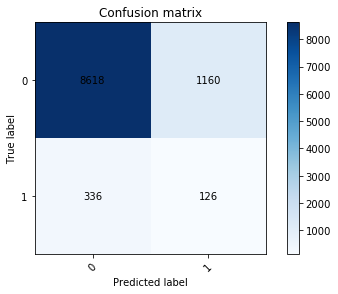

In [44]:
preds = RF_best_model.predict(test_X)
cm = confusion_matrix(test_y,preds)

plot_confusion_matrix(cm, ['0', '1'])

In [45]:
imbalanced_ratio = 1.0*(len(train_y) - sum(train_y)) /sum(train_y) 
imbalanced_ratio

22.800796812749002

(23896, 36)
(23896,)
(10240,)


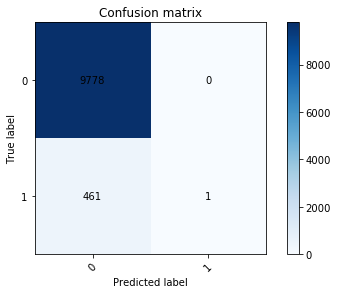

In [46]:
reduced_train_X = train_final_df[numericals]
print reduced_train_X.shape
print train_y.shape

reduced_test_X = test_X[numericals]

reduced_model = RandomForestClassifier(n_estimators=20, max_features="sqrt", min_samples_leaf=2,class_weight = {1:22.8})
reduced_model.fit(reduced_train_X, train_y)
reduced_pred = reduced_model.predict(reduced_test_X)
print reduced_pred.shape
recuded_cm = confusion_matrix(test_y,reduced_pred)

plot_confusion_matrix(recuded_cm, ['0', '1'])



#### 3.2 SVC

In [47]:
from sklearn.svm import SVC
clf = SVC(class_weight={0:1,1: 22})
clf.fit(train_final_df, train_y) 


SVC(C=1.0, cache_size=200, class_weight={0: 1, 1: 22}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

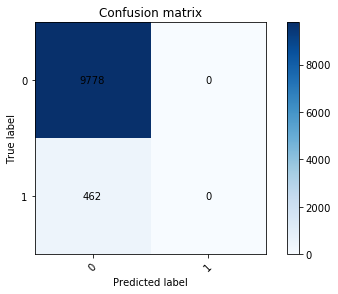

In [48]:
preds = clf.predict(test_X)
cm = confusion_matrix(test_y,preds)
plot_confusion_matrix(cm, ['0', '1'])

let's use the model to predict training data itself

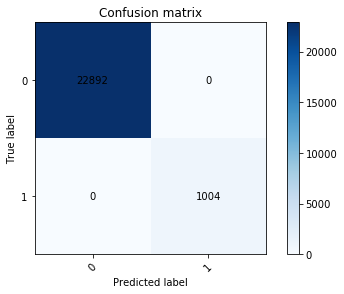

In [49]:
train_preds = clf.predict(train_final_df)
cm = confusion_matrix(train_y,train_preds)
plot_confusion_matrix(cm, ['0', '1'])

It works extremely well on train data. maybe it is overfitting. Let's try simpler model

#### 3.3 SGD Classifier

/Users/huangzhe/anaconda/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


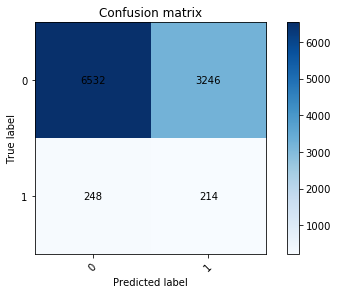

In [50]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(class_weight={1:22.8},loss='hinge',penalty='l1')
sgd_clf.fit(train_final_df,train_y)


sgd_preds = sgd_clf.predict(test_X)

sgd_cm = confusion_matrix(test_y,sgd_preds)
plot_confusion_matrix(sgd_cm, ['0', '1'])

### 3.4 KNN

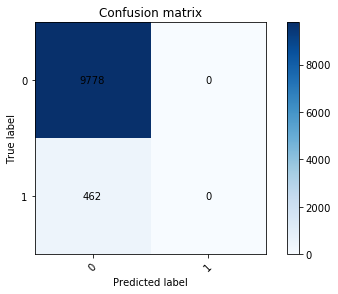

In [51]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neighbors=100)
neighbor.fit(train_final_df,train_y)

knn_preds = neighbor.predict(test_X)

knn_cn = confusion_matrix(test_y,knn_preds)
plot_confusion_matrix(knn_cn, ['0', '1'])


Even KNN can't work well

#### 3.3 XGboost

Since the Data is very imbalanced, we can try to tune scale_pos_weight in XGBClassifier to see if there is any chance to get better model

/Users/huangzhe/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


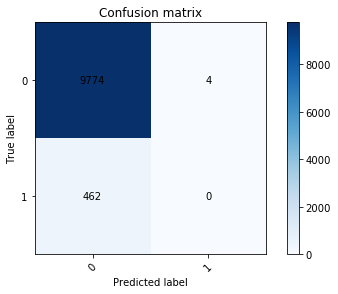

In [52]:


import xgboost as xgb

xgb1 = xgb.XGBClassifier(
    learning_rate =0.1,
    n_estimators=500,
    max_depth=50,
    min_child_weight=2,
    gamma=0,
    subsample=1,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=22.8,
    seed=27)

xg_boost=xgb1.fit(train_final_df, train_y)

#predicting on train data
preds = xg_boost.predict(test_X)

cm = confusion_matrix(test_y,preds)
plot_confusion_matrix(cm, ['0', '1'])


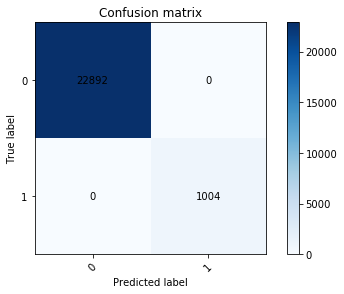

In [53]:
preds = xg_boost.predict(train_final_df)
cm = confusion_matrix(train_y,preds)
plot_confusion_matrix(cm, ['0', '1'])

there is no error while predict training data.

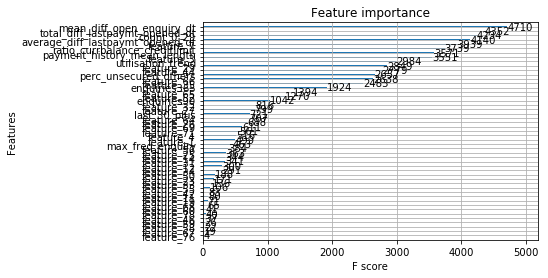

In [54]:
from xgboost import plot_importance
plot_importance(xgb1)
plt.show()

## 4 Explaination

Let's Apply PCA and reduce it to 2 dimension to see

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_x_pca=pca.fit_transform(train_final_df)
df_pca = pd.concat([pd.DataFrame(df_x_pca,columns=['p1','p2']),train_y.to_frame()],axis = 1)
print (df_x_pca.shape)
print (train_y.shape)

(23896, 2)
(23896,)


In [ ]:
df_pca.head(5)

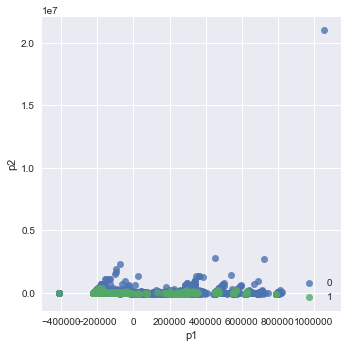

In [57]:
import seaborn as sns

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="p1", y="p2", data=df_pca, fit_reg=False, hue='Bad_label', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
sns.plt.show()



Apply PCA on test Data

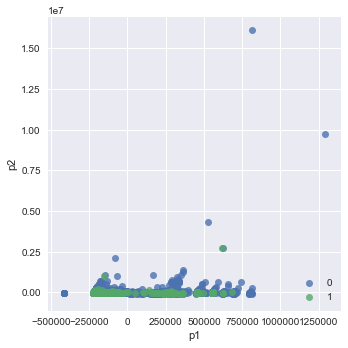

In [58]:

test_df_x_pca=pca.transform(test_X)
test_pca_df = pd.concat([pd.DataFrame(test_df_x_pca,columns=['p1','p2']),test_y.to_frame()],axis = 1)
sns.lmplot( x="p1", y="p2", data=test_pca_df, fit_reg=False, hue='Bad_label', legend=False)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

sns.plt.show()

we can see class 0 and 1 are largely overlapped. That is the reason why the models are bad at predicting 1.

One reason may be the test data is not clean. 
but likely reason is that there are some error in the data conversion

But due to limited timing, I have leave the bug checking for future work.